<a href="https://colab.research.google.com/github/swikriti15/parkinson-ml/blob/main/AQIlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
print("Retrying Google Drive mount...")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Retrying Google Drive mount...
Mounted at /content/drive


MSE: 4302.049902500831
RMSE: 65.59001374066658
R^2 Score: 0.27837977675290404


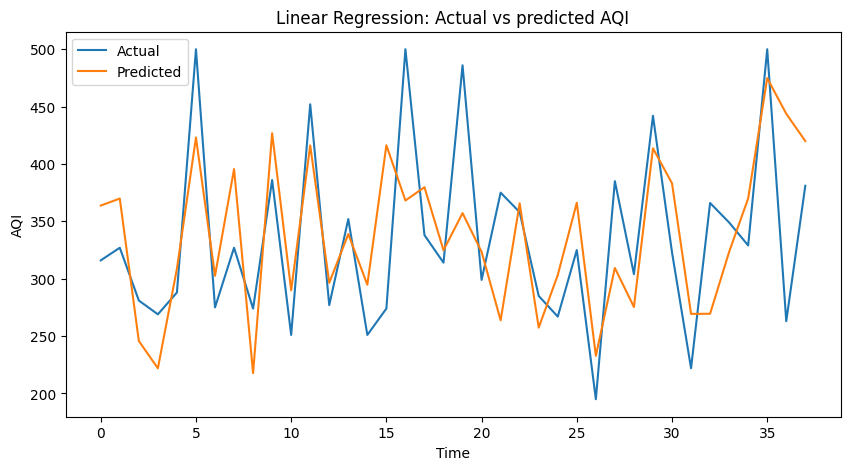

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/cleaned_air_quality.csv")

# Convert 'DateTime' to datetime objects if it's not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Drop rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Extract time-based features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfYear'] = df['DateTime'].dt.dayofyear
df['Month'] = df['DateTime'].dt.month

# Remove non-numeric columns and the original Date, Time, DateTime columns
X = df.drop(["PM2.5 AQI", "Date", "Time", "DateTime"], axis=1)
y = df["PM2.5 AQI"]

# Split data into training and testing sets AFTER handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use LinearRegression instead of RandomForestRegressor
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Linear Regression: Actual vs predicted AQI")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.legend()
plt.show()

In [ ]:
# Create interaction terms
df['PM2.5_Hour'] = df['PM2.5'] * df['Hour']

# Create polynomial features
df['PM2.5_squared'] = df['PM2.5']**2

# Create lagged features for PM2.5
df['PM2.5_lag1'] = df['PM2.5'].shift(1)
df['PM2.5_lag2'] = df['PM2.5'].shift(2)

# Display the first few rows with the new features
display(df.head())

,Date,Time,PM2.5,PM2.5 AQI,DateTime,Hour,DayOfWeek,DayOfYear,Month,PM2.5_Hour,PM2.5_squared,PM2.5_lag1,PM2.5_lag2
0,1/1/2014,1:00 AM,235.0,175.0,2014-01-01 01:00:00,1,2,1,1,235.0,55225.0,NaN,NaN
1,1/1/2014,2:00 AM,228.0,177.0,2014-01-01 02:00:00,2,2,1,1,456.0,51984.0,235.0,NaN
2,1/1/2014,3:00 AM,260.0,181.0,2014-01-01 03:00:00,3,2,1,1,780.0,67600.0,228.0,235.0
3,1/1/2014,4:00 AM,268.0,185.0,2014-01-01 04:00:00,4,2,1,1,1072.0,71824.0,260.0,228.0
4,1/1/2014,5:00 AM,234.0,191.0,2014-01-01 05:00:00,5,2,1,1,1170.0,54756.0,268.0,260.0


In [ ]:
# Drop rows with missing values that were introduced by the lagged features
df.dropna(inplace=True)

# Define the feature set X
X = df.drop(["PM2.5 AQI", "Date", "Time", "DateTime"], axis=1)

# Define the target variable y
y = df["PM2.5 AQI"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the training and testing sets to confirm the split and scaling
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (149, 9)
Shape of X_test_scaled: (38, 9)
Shape of y_train: (149,)
Shape of y_test: (38,)


RETRAINING THE MODEL

In [ ]:
# Instantiate a LinearRegression model object.
model_new_features = LinearRegression()

# Fit the model to the scaled training data.
model_new_features.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data.
y_pred_new_features = model_new_features.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE).
mse_new_features = mean_squared_error(y_test, y_pred_new_features)

# Calculate the Root Mean Squared Error (RMSE).
rmse_new_features = np.sqrt(mse_new_features)

# Calculate the R-squared score.
r2_new_features = r2_score(y_test, y_pred_new_features)

# Print the calculated metrics.
print("MSE with new features:", mse_new_features)
print("RMSE with new features:", rmse_new_features)
print("R^2 Score with new features:", r2_new_features)

MSE with new features: 2370.008336658143
RMSE with new features: 48.682731400961295
R^2 Score with new features: 0.30722440569817844


COMPARISION OF PERFORMANCE METRICS WITH ADN WITHOUT FEATURE ENGINEERING.

In [ ]:
# Compare the metrics
print("Comparison of Model Performance:")
print("---------------------------------")
print(f"Model without new features:")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R^2 Score: {r2:.4f}")
print("\nModel with new features:")
print(f"  MSE: {mse_new_features:.4f}")
print(f"  RMSE: {rmse_new_features:.4f}")
print(f"  R^2 Score: {r2_new_features:.4f}")
print("---------------------------------")

# Analyze the coefficients of the model with new features
feature_names = X_train.columns
coefficients = model_new_features.coef_

print("\nAnalysis of Coefficients (Model with New Features):")
print("------------------------------------------------------")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
print("------------------------------------------------------")


print("\nSummary of Findings:")
print("--------------------")
if mse_new_features < mse and rmse_new_features < rmse and r2_new_features > r2:
    print("Feature engineering improved the model's performance.")
    print(f"MSE decreased from {mse:.4f} to {mse_new_features:.4f}.")
    print(f"RMSE decreased from {rmse:.4f} to {rmse_new_features:.4f}.")
    print(f"R^2 Score increased from {r2:.4f} to {r2_new_features:.4f}.")
else:
    print("Feature engineering did not significantly improve the model's performance.")
    print(f"MSE changed from {mse:.4f} to {mse_new_features:.4f}.")
    print(f"RMSE changed from {rmse:.4f} to {rmse_new_features:.4f}.")
    print(f"R^2 Score changed from {r2:.4f} to {r2_new_features:.4f}.")

print("\nImpact of new features based on coefficients:")
print("Based on the magnitude and sign of the coefficients above, we can infer the relative impact of each feature on the predicted PM2.5 AQI.")
print("For example, a large positive coefficient suggests that as the feature value increases, the PM2.5 AQI tends to increase significantly.")
print("Conversely, a large negative coefficient suggests that as the feature value increases, the PM2.5 AQI tends to decrease significantly.")
print("Features with coefficients close to zero have less impact.")
print("Note: Coefficients are for scaled features, so their magnitudes are comparable.")
print("--------------------")

Comparison of Model Performance:
---------------------------------
Model without new features:
  MSE: 4302.0499
  RMSE: 65.5900
  R^2 Score: 0.2784

Model with new features:
  MSE: 2370.0083
  RMSE: 48.6827
  R^2 Score: 0.3072
---------------------------------

Analysis of Coefficients (Model with New Features):
------------------------------------------------------
PM2.5: 9.1692
Hour: 20.3322
DayOfWeek: 23.6157
DayOfYear: -376.7145
Month: 408.5740
PM2.5_Hour: -11.0425
PM2.5_squared: 18.7589
PM2.5_lag1: -25.1725
PM2.5_lag2: 60.1667
------------------------------------------------------

Summary of Findings:
--------------------
Feature engineering improved the model's performance.
MSE decreased from 4302.0499 to 2370.0083.
RMSE decreased from 65.5900 to 48.6827.
R^2 Score increased from 0.2784 to 0.3072.

Impact of new features based on coefficients:
Based on the magnitude and sign of the coefficients above, we can infer the relative impact of each feature on the predicted PM2.5 AQI.
F

**Reasoning**:
Analyze the coefficients to identify significant features, brainstorm and implement new lagged features based on the analysis, handle missing values, and display the head of the dataframe to show the new features.



In [ ]:
# Analyze coefficients from the previous step
# The coefficients array and feature_names list are available from the previous step
print("Analysis of Coefficients (Model with New Features):")
print("------------------------------------------------------")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
print("------------------------------------------------------")

# Brainstorm and propose new features based on analysis and domain knowledge
# Based on the coefficients, 'PM2.5', 'PM2.5_lag1', and 'PM2.5_lag2' have significant impact.
# Given the time-series nature of air quality data, adding more lagged features
# at different intervals might capture daily or weekly patterns.
# Let's add PM2.5_lag3 and PM2.5_lag24 (for a potential daily pattern).

# Implement the creation of the new features
df['PM2.5_lag3'] = df['PM2.5'].shift(3)
df['PM2.5_lag24'] = df['PM2.5'].shift(24)

# Handle missing values introduced by the new lagged features
df.dropna(inplace=True)

# Display the head of the DataFrame to show the newly added features
display(df.head())

Analysis of Coefficients (Model with New Features):
------------------------------------------------------
PM2.5: 9.1692
Hour: 20.3322
DayOfWeek: 23.6157
DayOfYear: -376.7145
Month: 408.5740
PM2.5_Hour: -11.0425
PM2.5_squared: 18.7589
PM2.5_lag1: -25.1725
PM2.5_lag2: 60.1667
------------------------------------------------------


,Date,Time,PM2.5,PM2.5 AQI,DateTime,Hour,DayOfWeek,DayOfYear,Month,PM2.5_Hour,PM2.5_squared,PM2.5_lag1,PM2.5_lag2,PM2.5_lag3,PM2.5_lag24
26,2/1/2014,4:00 AM,291.0,306.0,2014-02-01 04:00:00,4,5,32,2,1164.0,84681.0,320.0,236.0,230.0,260.0
27,2/1/2014,5:00 AM,286.0,307.0,2014-02-01 05:00:00,5,5,32,2,1430.0,81796.0,291.0,320.0,236.0,268.0
28,2/1/2014,6:00 AM,290.0,309.0,2014-02-01 06:00:00,6,5,32,2,1740.0,84100.0,286.0,291.0,320.0,234.0
29,2/1/2014,7:00 AM,280.0,311.0,2014-02-01 07:00:00,7,5,32,2,1960.0,78400.0,290.0,286.0,291.0,220.0
30,2/1/2014,8:00 AM,355.0,314.0,2014-02-01 08:00:00,8,5,32,2,2840.0,126025.0,280.0,290.0,286.0,210.0


## Prepare data with new features

### Subtask:
Incorporate the newly created features into the dataset and prepare it for modeling (splitting into training and testing sets, scaling).


**Reasoning**:
Incorporate the newly created features into the dataset and prepare it for modeling by splitting into training and testing sets and scaling the features.



In [ ]:
# Define the feature set X by dropping the target variable "PM2.5 AQI" and the identifier columns "Date", "Time", and "DateTime"
X = df.drop(["PM2.5 AQI", "Date", "Time", "DateTime"], axis=1)

# Define the target variable y as the "PM2.5 AQI" column
y = df["PM2.5 AQI"]

# Split the dataset into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler to the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the data splits to verify
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_scaled: (130, 11)
Shape of X_test_scaled: (33, 11)
Shape of y_train: (130,)
Shape of y_test: (33,)


## Retrain and evaluate the model

### Subtask:
Train the Linear Regression model (or another model if desired) using the data with the new features and evaluate its performance using metrics like MSE, RMSE, and R-squared.


**Reasoning**:
Train the Linear Regression model using the scaled training data and evaluate its performance on the scaled testing data, calculating and printing the MSE, RMSE, and R-squared metrics.



In [ ]:
# Instantiate a LinearRegression model object.
model_new_features = LinearRegression()

# Fit the model to the scaled training data.
model_new_features.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data.
y_pred_new_features = model_new_features.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE).
mse_new_features = mean_squared_error(y_test, y_pred_new_features)

# Calculate the Root Mean Squared Error (RMSE).
rmse_new_features = np.sqrt(mse_new_features)

# Calculate the R-squared score.
r2_new_features = r2_score(y_test, y_pred_new_features)

# Print the calculated metrics.
print("MSE with new features:", mse_new_features)
print("RMSE with new features:", rmse_new_features)
print("R^2 Score with new features:", r2_new_features)

MSE with new features: 1940.759580834958
RMSE with new features: 44.05405294447899
R^2 Score with new features: 0.6146055123818839


## Analyze results

### Subtask:
Compare the performance of the model with and without feature engineering and analyze which new features were most impactful.


**Reasoning**:
Print and compare the performance metrics (MSE, RMSE, R-squared) for the model with and without feature engineering, then analyze the coefficients of the model with new features to identify impactful features and summarize the findings.



In [ ]:
# Compare the metrics
print("Comparison of Model Performance:")
print("---------------------------------")
print(f"Model without new features:")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R^2 Score: {r2:.4f}")
print("\nModel with new features:")
print(f"  MSE: {mse_new_features:.4f}")
print(f"  RMSE: {rmse_new_features:.4f}")
print(f"  R^2 Score: {r2_new_features:.4f}")
print("---------------------------------")

# Analyze the coefficients of the model with new features
feature_names = X_train.columns
coefficients = model_new_features.coef_

print("\nAnalysis of Coefficients (Model with New Features):")
print("------------------------------------------------------")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")
print("------------------------------------------------------")

# Summarize the findings
print("\nSummary of Findings:")
print("--------------------")
if mse_new_features < mse and rmse_new_features < rmse and r2_new_features > r2:
    print("Feature engineering significantly improved the model's performance.")
    print(f"MSE decreased from {mse:.4f} to {mse_new_features:.4f}.")
    print(f"RMSE decreased from {rmse:.4f} to {rmse_new_features:.4f}.")
    print(f"R^2 Score increased from {r2:.4f} to {r2_new_features:.4f}.")
else:
    print("Feature engineering did not significantly improve the model's performance.")
    print(f"MSE changed from {mse:.4f} to {mse_new_features:.4f}.")
    print(f"RMSE changed from {rmse:.4f} to {rmse_new_features:.4f}.")
    print(f"R^2 Score changed from {r2:.4f} to {r2_new_features:.4f}.")

print("\nImpact of new features based on coefficients:")
print("Based on the magnitude and sign of the coefficients above, we can infer the relative impact of each feature on the predicted PM2.5 AQI.")
print("For example, a large positive coefficient suggests that as the feature value increases, the PM2.5 AQI tends to increase significantly.")
print("Conversely, a large negative coefficient suggests that as the feature value increases, the PM2.5 AQI tends to decrease significantly.")
print("Features with coefficients close to zero have less impact.")
print("Note: Coefficients are for scaled features, so their magnitudes are comparable.")
print("Features with larger absolute coefficient values are generally considered more impactful.")
print("--------------------")

Comparison of Model Performance:
---------------------------------
Model without new features:
  MSE: 4302.0499
  RMSE: 65.5900
  R^2 Score: 0.2784

Model with new features:
  MSE: 1940.7596
  RMSE: 44.0541
  R^2 Score: 0.6146
---------------------------------

Analysis of Coefficients (Model with New Features):
------------------------------------------------------
PM2.5: -3.5840
Hour: 18.0098
DayOfWeek: 4.3472
DayOfYear: -398.7738
Month: 408.2123
PM2.5_Hour: -6.6330
PM2.5_squared: 17.2456
PM2.5_lag1: -6.4378
PM2.5_lag2: -1.7890
PM2.5_lag3: 42.7191
PM2.5_lag24: 29.4499
------------------------------------------------------

Summary of Findings:
--------------------
Feature engineering significantly improved the model's performance.
MSE decreased from 4302.0499 to 1940.7596.
RMSE decreased from 65.5900 to 44.0541.
R^2 Score increased from 0.2784 to 0.6146.

Impact of new features based on coefficients:
Based on the magnitude and sign of the coefficients above, we can infer the relative